# <u>Data, Metadata and APIs</u>
# <u>Part 3: Viewing Metadata in Image Files</u>

As we already mentioned, every bitmap starts with a 54-byte header. This header encodes information about the file. Every bitmap identifies itself by reserving the first two bytes of the header for the ASCII-encoded letters "BM". As you can see from this ASCII table (http://www.ascii-code.com/), the letter "B" corresponds to the integer 66, and the letter "M" corresponds to the integer 77. Here are the first two bytes of our bitmap expressed as integers:

In [1]:
with open("flowers.bmp", 'rb') as original_image:
    original_data = original_image.read()
    original_bytes = bytearray(original_data)
    
print(str(original_bytes[0]) + " " + str(original_bytes[1]))

66 77


While the two numbers above are in base 10, a byte is often expressed as two hexadecimal digits. You can again reference the ASCII table (http://www.ascii-code.com/) to see that 66 in base 10 (decimal) is the same as "42" in hexadecimal. Likewise, 77 in base 10 is "4d" in hex. This time, let's extract the first two bytes of our header in hex:



In [2]:
print(str(hex(original_bytes[0])) + " " + str(hex(original_bytes[1])))

0x42 0x4d


The "0x" at the beginning of each of the numbers below is meant to communicate a base 16 number ("x" for "hex"). 

Either way, the first two bytes of every bitmap are meant to represent the letters "B" and "M" using the ASCII encoding. Here are the first two bytes of our header one last time (this time representing them as letters from the ASCII encoding):

In [3]:
first_byte = bytes([original_bytes[0]])
second_byte = bytes([original_bytes[1]])

print(str(first_byte.decode("ascii")) + str(second_byte.decode("ascii")))

BM


### <u>Task #1: Answer the following questions</u>

**<u>Question 1:</u>** What are the first two bytes of our bitmap in binary? Use the _bin()_ method to complete this task.
    
**<u>Your Answer: 0b1000010 , 0b1001101</u>**

In [4]:
# Your code here:
bin1 = bin(original_bytes[0])
bin2 = bin(original_bytes[1])
print(bin1, bin2)

0b1000010 0b1001101


**<u>Question 2:</u>** What does the "0b" at the beginning of each number represent in the cell above?

**<u>Your Answer: It is a prefix to denote that the number is in binary</u>**

**<u>Question 3:</u>** How many "0"s and "1"s follow the "0b"? Based on your knowledge of bits and bytes, why does this make sense?

**<u>Your Answer: 7 this makes sense as the eighth bit isn't displayed as it isn't needed to represent the values 66 and 77 there for 7/8 bits in the bytes are being used.</u>**

### <u>Bitmap Metadata</u>

A bitmap is a pretty barebones file format. The data in the 54-byte bitmap header stores information about the image file itself such as the size of the file in bytes, the width/height of the image, and the colors contained within it. But that's about it. For example, here's some code that can find the width and height of a bitmap image by reading the appropriate bytes in the header:

In [5]:
with open("flowers.bmp", 'rb') as original_image:
    original_image.seek(18)
    bytes_width = original_image.read(4)
    width = int.from_bytes(bytes_width, byteorder='little')
    original_image.seek(22)
    bytes_height = original_image.read(4)
    height = int.from_bytes(bytes_height, byteorder='little')
    print([width,height])

[360, 480]


This image is 360 pixels by 480 pixels. There are a limited number of additional details about your bitmap stored in the header (to learn more, check out the following: http://www.fastgraph.com/help/bmp_header_format.html). But if you want to use the header of this bitmap to learn things such as where the photograph was taken, who owns the copyright to the photograph, etc., then you are fresh out of luck.

However, some other image file formats have the ability to store "metadata" This can include what kind of camera was used to take the photo, the date/time the photo was taken, the author, and much more. In fact, the _.bmp_ file we are working with in this exercise originally came from a _.jpg_ file that had metadata in it. 

Let's switch gears to _.jpg_ files:

### <u>Review of the JPEG Image File Format</u>

The _.jpg_ file format utilizes a lossy compression algorithm. This does does exactly what it sounds like: information that was stored in the original, uncompressed file is lost when you use lossy compression. The benefit of lossy compression is that the compressed file size can be much smaller than the original.

Ideally, a lossy compression algorithm discards information that was difficult (or impossible) for humans to notice. For an image, this would be color data or detail that the human eye can't detect. When compression goes too far in a _.jpg_ file, you can often spot what what is "lost" in the form of noticeable visual artifacts. 

Let's compare the size of the _.bmp_ version of the flower vase and the _.jpg_ version.

First, the uncompressed *.bmp*:

In [6]:
with open("flowers.bmp", 'rb') as original_image:
    original_data = original_image.read()
    original_bytes = bytearray(original_data)

print(len(original_bytes))

518456


Now the compressed *.jpg*: 

In [7]:
with open("flowers_metadata.jpg", 'rb') as jpeg_image:
    jpeg_data = jpeg_image.read()
    jpeg_bytes = bytearray(jpeg_data)

print(len(jpeg_bytes))

296881


518,456 bytes for an uncompressed bitmap, and 296,881 bytes for a compressed JPEG.

### Task #2: Write code below to display the bitmap and the JPEG in this notebook:

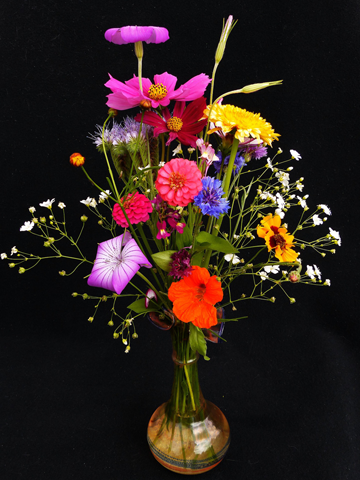

In [8]:
# Code to display bitmap:
from PIL import Image
img = Image.open("flowers.bmp")
img.save("output/flowers.png",'png')

from IPython.display import Image
Image(filename="output/flowers.png")

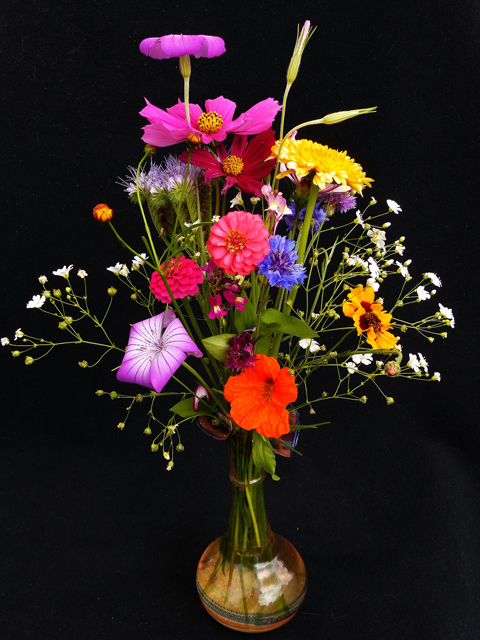

In [9]:
# Code to display JPEG:
# Code to display bitmap:
from PIL import Image
img = Image.open("flowers_metadata.jpg")
img.save("output/flowers_meta.png",'png')

from IPython.display import Image
Image(filename="output/flowers_meta.png")

**<u>Question 4:</u>** Can you tell the difference between the bitmap and the JPEG? Explain.

**<u>Your Answer: No as the colors removed by the jpeg compression algorithm</u>**

### <u>Metadata in the JPEG Image File Format</u>

The _.jpg_ file format can store much more metadata than the _.bmp_ file format. Let's see what we can find in _flowers.jpg_.

*Note: The code cell below is cheating a little bit. The author of this notebook previously analyzed the file to see where to look for some interesting metadata. This code extracts raw bytes from the .jpg file and converts them to a list of characters:*

In [10]:
brand_array = []
model_array = []
date_array = []
author_array = []

for i in range(164,173):
    brand_array.append(chr(jpeg_bytes[i]))

for i in range(174,183):
    model_array.append(chr(jpeg_bytes[i]))
    
for i in range(380,399):
    date_array.append(chr(jpeg_bytes[i]))
    
for i in range(248,261):
    author_array.append(chr(jpeg_bytes[i]))
    
print(brand_array) 
print(model_array)
print(date_array)
print(author_array)

['P', 'a', 'n', 'a', 's', 'o', 'n', 'i', 'c']
['D', 'M', 'C', '-', 'F', 'Z', '2', '0', '0']
['2', '0', '1', '6', ':', '0', '7', ':', '2', '5', ' ', '1', '4', ':', '0', '2', ':', '4', '5']
['J', 'a', 'k', 'o', 'b', ' ', 'S', 't', 'r', 'a', 'u', 's', 's']


This file clearly contains more than just raw image data. Raw image data would look completely unintelligible if we tried to convert bytes to ASCII characters. Here's the same extracted data from above, but formatted in a more readable fashion: 

In [11]:
print(''.join(brand_array) + ' ' + ''.join(model_array) + ' ' + ''.join(date_array) + ' ' + ''.join(author_array))

Panasonic DMC-FZ200 2016:07:25 14:02:45 Jakob Strauss


The metadata in this file tells us that the photograph was taken on a Panasonic DMC-FZ200 camera on July 25, 2016 at 2:02pm by a photographer named Jakob Strauss. This file gave up a lot of information about its origins, and this isn't even the full extent of what can be stored as metadata!

### <u>Task #3: Research the term "metadata" online, then answer the questions below:</u>

**<u>Question 5:</u>** In your own words, what is your definition of the term "metadata"?

**<u>Your Answer: Meta data is data that provides addition data for the file that may be used to catagorize the file or for other reasons but is not needed for the file to exist and carry out its purpose.</u>**

**<u>Question 6:</u>** What are some examples of file formats that can store metadata? Your answer should not be limited to image file formats.

**<u>Your Answer: .jpg, .mp4, .docx, .mp3, .pdf, .xml</u>**

**<u>Question 7:</u>** What kind of information is commonly included as metadata? Make sure to include information not already discovered in our _.jpg_ file.

**<u>Your Answer: </u>**

**<u>Question 8:</u>** What are some practical uses for metadata? Answer this same question a few times from the perspectives of several different perspectives:

  * <u>A typical consumer: Know how old file is and how and do research on author.</u>

  * <u>An advertising company: When the company was founded and who the CEO is</u>

  * <u>A law enforcement agency: An easy way to look for people to see if they've done anything bad in the past.</u>

  * <u>You: Search for similar files/programs</u>

**<u>Question 9:</u>** What are some ethical and/or privacy concerns relevant to metadata?

**<u>Your Answer: Metadata can reveal additional and potentially sensitive information in addition to whatever is contained inside a file</u>**

**<u>Question 10:</u>** Can you find the word "Adobe Photoshop" somewhere between indices 100 to 350 in the jpeg_bytes array?.  Adjust your loop accordingly so that only "Adobe Photoshop" prints below:

**<u>Your Answer: Yes</u>**

In [12]:
# Your code here
new_Arr = []

for i in range(200,215):
    new_Arr.append(chr(jpeg_bytes[i]))

print("".join(new_Arr))

Adobe Photoshop


**<u>Question 11:</u>** Search for metadata in a photo you have taken, either with your phone or iPad. Display your photo in the notebook below, and at least one interesting piece of information you have found in its metadata.

**<u>Summarize Your Discoveries: Phone model is SM-A215U, Taken on 9/15/22 at 6:46:43 AM, Phone brand/camera is samsung</u>**

SM-A215U 2022:09:15 06:46:43 samsung

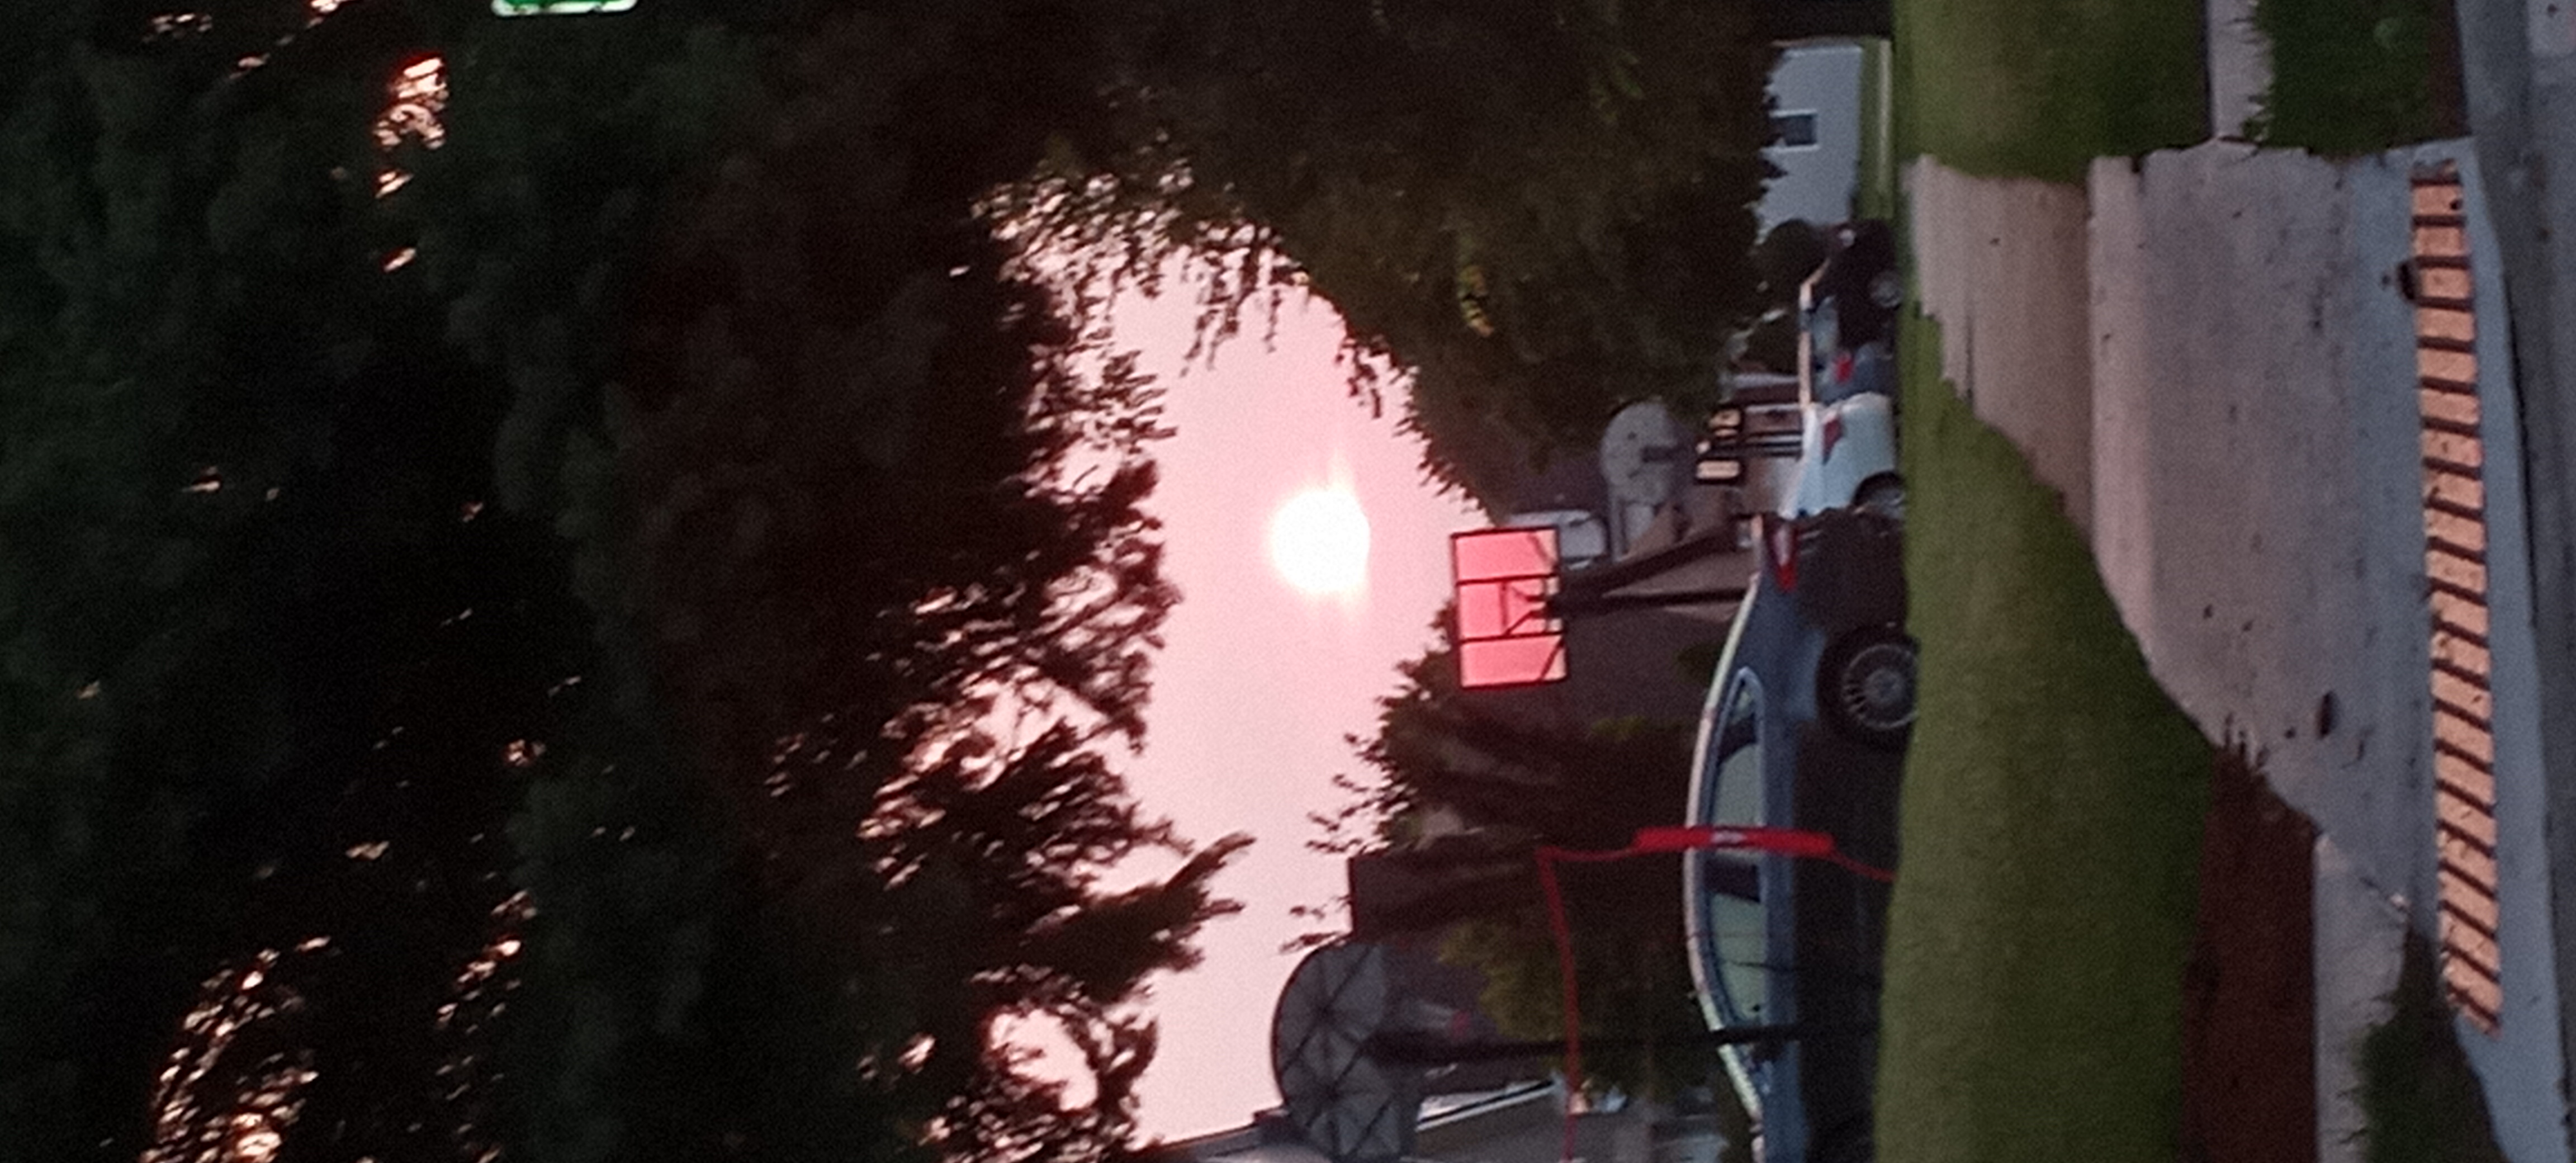

In [13]:
# Your code here to display the image
from PIL import Image
img = Image.open("unnamed.jpg")

from IPython.display import Image
Image(filename="unnamed.jpg")

In [14]:
# Your code here to display metadata information
with open("unnamed.jpg", 'rb') as jpeg_image:
    img_data = jpeg_image.read()
    img_bytes = bytearray(img_data)

arr = []

for i in range(86, 122):
    arr.append(chr(img_bytes[i]))

print("".join(arr))

SM-A215U 2022:09:15 06:46:43 samsung
